<a href="https://colab.research.google.com/github/Alikato-145/42Bangkok/blob/main/Midterm_67_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a CNN to classify images.


### รูปภาพที่ให้มามี 4 คลาส โดยมีหมายเลขคลาสดังนี้:
<ol start="0">
<li> bird
<li> cat
<li> deer
<li> frog
</ol>

In [ ]:
import time, datetime
import requests, pickle
import numpy as np
from tensorflow import keras
from IPython import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # uncomment to Disable GPU training

In [ ]:
import random, tensorflow as tf

def set_seed(seed_value=12345):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

In [ ]:
print('Default GPU Device:', tf.test.gpu_device_name() or 'None')

Default GPU Device: /device:GPU:0


In [ ]:
class_names = ['bird', 'cat', 'deer', 'frog']

(X_train_c, y_train_c, X_val_c, y_val_c, X_test_c, y_test_c) = pickle.load(open('364_midterm_data.pkl', "rb"))

# url = "https://drive.google.com/uc?id=1y-Q4R5Txi_IsX-rsS-XTjkhpTiLJiYDh"
# (X_train_c, y_train_c, X_val_c, y_val_c, X_test_c, y_test_c) = pickle.loads(requests.get(url).content)

### ดูรูปภาพในชุดข้อมูล

In [ ]:
def show_images(X, y, class_names, n_rows=3, n_cols=8, figsize=(9, 4)):
    fig = plt.figure(figsize=figsize)
    for i in range(0, n_rows):
        for j in range(0, n_cols):
            idx = i*n_cols + j
            image = X[idx]
            label = class_names[y[idx][0]]
            ax = plt.subplot(n_rows, n_cols, idx+1)
            plt.imshow(image)
            plt.text(16, 36, str(y[idx]) + ' - ' + label, ha='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

[0] bird


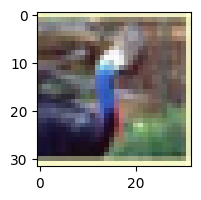

In [ ]:
print(y_test_c[1], class_names[y_test_c[1][0]])
plt.figure(figsize=(2, 2))
plt.imshow(X_test_c[1])

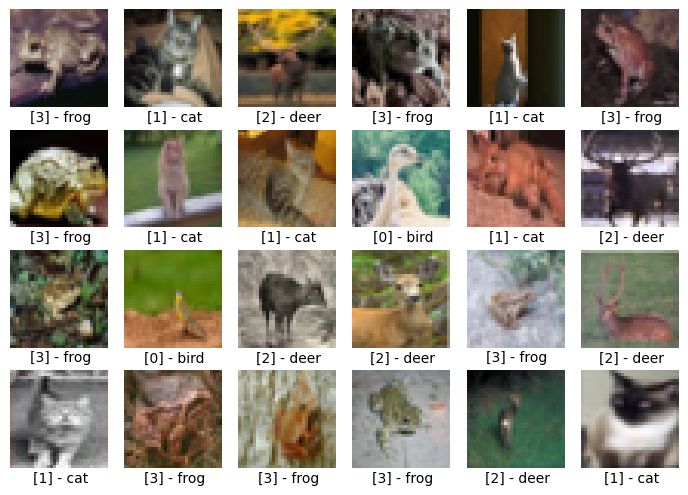

In [ ]:
show_images(X_train_c, y_train_c, class_names, 4, 6, figsize=(7, 5))

### Normalize images and One-Hot Encode labels

In [ ]:
n_classes = len(class_names)

y_train = keras.utils.to_categorical(y_train_c, n_classes)
y_val = keras.utils.to_categorical(y_val_c, n_classes)
y_test = keras.utils.to_categorical(y_test_c, n_classes)

In [ ]:
X_train = X_train_c.astype('float32') / 255
X_val = X_val_c.astype('float32') / 255
X_test = X_test_c.astype('float32') / 255

<style> h3 { margin-top: 0.5em !important; margin-bottom: 0.0em; }
        h4 { margin-top: 0.1em !important; margin-bottom: 0.1em; }
        h5 { margin-top: 0.0em; margin-bottom: 0.2em; } </style>

# <span style="color:blue">โจทย์คำถาม</span>
* ### เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 ในทุกกรณีที่เกี่ยวข้องกับการสุ่ม และให้เรียกใช้ฟังก์ชัน set_seed(12345) ทุกครั้งก่อนที่จะสร้างโมเดล
* ### ให้แยกคำตอบของแต่ละข้อออกเป็นสัดส่วนที่ชัดเจน โดยใช้ markdown หรือ heading เพื่อระบุว่าคำตอบใน cell นั้นเป็นของโจทย์ข้อใด
* ### 1. ให้สร้างโมเดลด้วย CNN เพื่อให้ได้ accuracy ที่ดีที่สุด และ<span style="color:red">ห้ามใช้ Early Stopping หรือใช้ Best Weights ในการเทรนโมเดล</span> โดยให้เทรนโมเดลเต็มจำนวน epoch ที่นิสิตกำหนด โดยค่า epoch ต้องไม่น้อยกว่า 50 และต้องหารด้วย 20 ลงตัว
  * #### (10 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.65
  * #### (15 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.70
  * #### (20 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.75
  * #### (25 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.80
  * #### (30 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.82
  * #### (35 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.85
  * #### (40 คะแนน) ค่า accuracy จากข้อมูลเทสไม่น้อยกว่า 0.88
* ### 2. (20 คะแนน) ให้แสดงกราฟ Loss และ Accuracy ของโมเดลที่เกิดจากการเทรนโมเดล และหลังจากโมเดลถูกเทรนแล้วเสร็จ ให้แสดงค่า Accuracy ที่วัดได้จากชุดข้อมูล train, validation และ test
* ### 3. (20 คะแนน) ให้แสดง Confusion Matrix ผลการทำนายที่ได้จากโมเดลด้วยข้อมูลเทส
  ##### บอกใบ้ จากโค้ดข้างล่าง ค่าข้อมูลแต่ละตัวใน y_pred (ที่ได้จาก model.predict(...)) และ y_test จะเป็นเวกเตอร์ที่มี 4 จำนวน (ตามจำนวนคลาส) โดยใน y_pred จะเก็บค่าความน่าจะเป็นที่อินพุต X_test จะเป็นแต่ละคลาส เช่น [0.6, 0.05, 0.15, 0.2] ซึ่งหมายถึง ความน่าจะเป็นที่อินพุตจะเป็นคลาส 0 มีค่าเป็น 0.6 และในลักษณะเดียวกัน y_test จะเก็บค่าผลเฉลยซึ่งอยู่ในรูป One-Hot Encoding เช่น [1, 0, 0, 0] ซึ่งหมายถึง ผลเฉลยของอินพุตเป็นคลาส 0 เป็นต้น เราใช้ np.argmax(...) เพื่อแปลงค่าที่อยู่ในรูปเวกเตอร์ให้กลายเป็นค่าสเกลาร์ เพื่อความสะดวกในการเปรียบเทียบระหว่างผลทำนายกับผลเฉลย
    ```python
    y_pred = model.predict(X_test, verbose=0)
    y_test_1d = np.argmax(y_test, axis=1)
    y_pred_1d = np.argmax(y_pred, axis=1)
    ```
  ##### ในโมดูล sklearn ภายใต้ metrics มีฟังก์ชัน confusion_matrix(...) ที่ใช้คำนวณ Confusion Matrix<br>
* ### 4. (20 คะแนน) ให้คำนวณค่า Recall ของแต่ละคลาสด้วยข้อมูลเทส โดยให้เขียนตอบในรูปนิพจน์ตามตัวอย่างด้านล่าง ซึ่งค่า Recall บ่งบอกถึงความสามารถของโมเดลในการทำนายคลาสที่สนใจได้อย่างถูกต้อง โดยโมเดลที่มีค่า Recall สูงบ่งบอกถึงโมเดลสามารถทำนายคลาสที่สนใจได้ถูกต้องเป็นจำนวนมาก ค่า Recall คำนวณได้จากสูตรข้างล่างนี้ <br><br> $$ Recall = {TruePositives \over TruePositives + FalseNegatives} $$
### จากตัวอย่างในตาราง Confusion Matrix ด้านล่างนี้ ค่า Recall ของคลาส Apple คำนวณได้จาก 7 / (7 + 1 + 3) = 0.6364 ส่วนของคลาส Orange คำนวณได้จาก 2 / (2 + 8 + 2) = 0.1667 และของคลาส Mango คำนวณได้จาก 1 / (1 + 9 + 3) = 0.0769

 <center><img src="https://drive.google.com/thumbnail?id=1v8N__pdOnfAV-JwBR4rfKJdTSqOSeAv4&sz=w500"></center>

* ### 5. (20 คะแนน) จงเปรียบเทียบและอธิบายค่า Recall ที่คำนวณได้จากทั้ง 4 คลาส และให้แสดงภาพจำนวน 5 ภาพที่มาจากคลาสที่มีค่า Recall สูงสุดแต่โมเดลทำนายผิด โดยให้แสดงค่าคลาสของแต่ละภาพที่โมเดลทำนายออกมาด้วย

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.metrics import confusion_matrix

In [ ]:
X_test.shape,y_test.shape

((2400, 32, 32, 3), (2400, 4))

1

In [ ]:
seed = 12345
set_seed(seed)

batch_size = 64
model = Sequential()

model.add(Conv2D(64, (5,5),strides=(1,1), input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (5,5),strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5,5),strides=(1,1),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(n_classes, activation='softmax'))

model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 conv2d_86 (Conv2D)          (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_85 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_87 (Conv2D)          (None, 8, 8, 64)          102464    
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=100,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
300/300 [==============================] - 2s 7ms/step - loss: 1.3158 - accuracy: 0.3608 - val_loss: 1.1957 - val_accuracy: 0.4633
Epoch 2/100
300/300 [==============================] - 2s 6ms/step - loss: 1.1503 - accuracy: 0.4961 - val_loss: 1.0806 - val_accuracy: 0.5437
Epoch 3/100
300/300 [==============================] - 2s 6ms/step - loss: 1.0801 - accuracy: 0.5310 - val_loss: 1.0396 - val_accuracy: 0.5592
Epoch 4/100
300/300 [==============================] - 2s 6ms/step - loss: 1.0379 - accuracy: 0.5592 - val_loss: 0.9960 - val_accuracy: 0.5846
Epoch 5/100
300/300 [==============================] - 2s 6ms/step - loss: 0.9930 - accuracy: 0.5874 - val_loss: 0.9317 - val_accuracy: 0.6317
Epoch 6/100
300/300 [==============================] - 2s 6ms/step - loss: 0.9438 - accuracy: 0.6097 - val_loss: 0.8859 - val_accuracy: 0.6358
Epoch 7/100
300/300 [==============================] - 2s 6ms/step - loss: 0.8888 - accuracy: 0.6415 - val_loss: 0.8490 - val_accuracy: 0.6725

คำตอบข้อ 2

In [ ]:
print('Train Loss: {:.6f}, Accuracy: {:.6f}'.format(*model.evaluate(X_train, y_train, verbose=0)))
print('Validation Loss: {:.6f}, Validation Accuracy:: {:.6f}'.format(*model.evaluate(X_val, y_val, verbose=0)))
print('Test Loss: {:.6f}, Test Accuracy:: {:.6f}'.format(*model.evaluate(X_test, y_test, verbose=0)))

Train Loss: 0.023215, Accuracy: 0.996719
Validation Loss: 0.631556, Validation Accuracy:: 0.832917
Test Loss: 0.722764, Test Accuracy:: 0.812917


Train Accuracy: 0.9967
Validation Accuracy: 0.8329
Test Accuracy: 0.8129


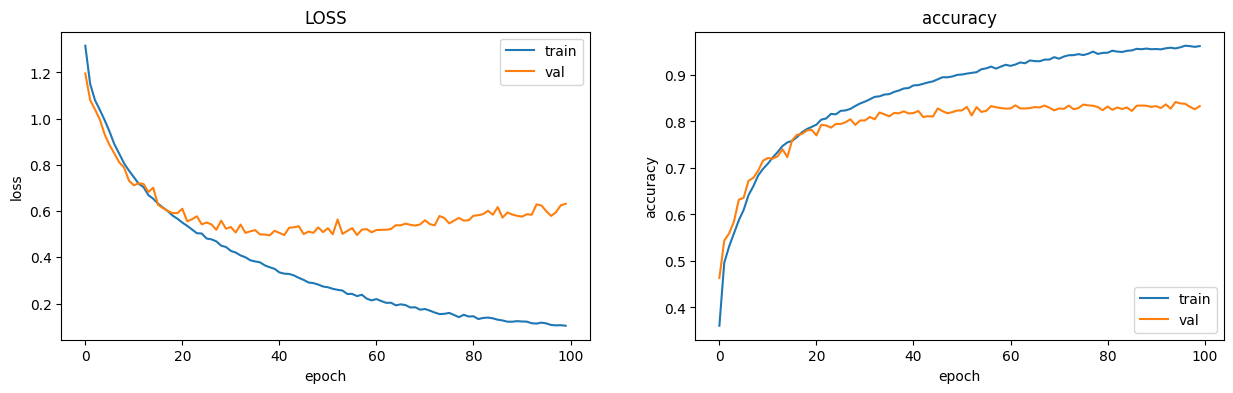

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('LOSS')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'],loc='upper right')

ax = fig.add_subplot(1,2,2)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_title('accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train','val'],loc='lower right')

train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

คำตอบข้อ 3

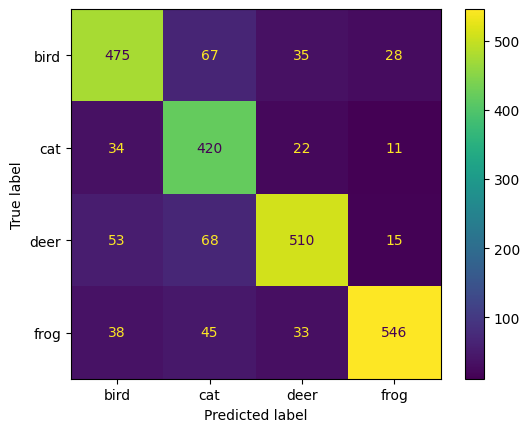

In [ ]:
y_pred = model.predict(X_test, verbose=0)
y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true=y_test_1d,y_pred = y_pred_1d).T
disp = ConfusionMatrixDisplay(confusion_matrix =cm,display_labels=class_names)
disp.plot()

คำตอบข้อ 4

In [ ]:
np.set_printoptions(precision=2)
bird = 475/(475+34+53+38)
print(f'recall bird:{bird}')
cat = 420/(420+67+68+45)
print(f'recall cat:{cat}')
deer = 510/(510+35+22+33)
print(f'recall deer:{deer}')
frog = 546/(546+15+11+28)
print(f'recall frog:{frog}')

recall bird:0.7916666666666666
recall cat:0.7
recall deer:0.85
recall frog:0.91


 คำตอบข้อ 5 จงเปรียบเทียบและอธิบายค่า Recall ที่คำนวณได้จากทั้ง 4 คลาส และให้แสดงภาพจำนวน 5 ภาพที่มาจากคลาสที่มีค่า Recall สูงสุดแต่โมเดลทำนายผิด โดยให้แสดงค่าคลาสของแต่ละภาพที่โมเดลทำนายออกมาด้วย

จากrecallที่ได้มาจะได้ว่า ไล่ลำดับจากมากไปน้อย (ความแม่นยำมากไปความแม่นยำน้อย)
ทำนาย frog ได้แม่นยำมากที่สุด  โดยมีค่า recallเป็น0.91 (ความแม่นยำมากที่สุด)
ทำนาย deer  ได้ถูกต้องมีค่า recallเป็น0.85
ทำนาย bird  ได้ถูกต้องมีค่า recallเป็น0.79
ทำนาย cat  ได้ถูกต้องมีค่า recallเป็น0.70 (ความแม่นยำต่ำที่สุด)

Recall per class: [0.79 0.7  0.85 0.91]
Class with highest recall: frog


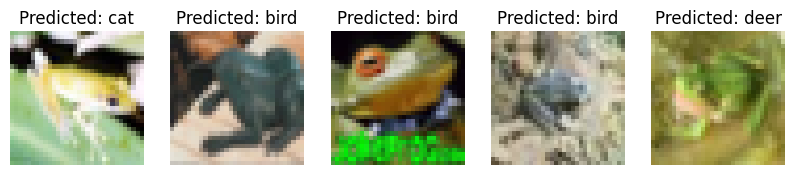

In [ ]:
recall_per_class = recall_score(y_test_1d, y_pred_1d, average=None)
print("Recall per class:", recall_per_class)

highest_recall_class = np.argmax(recall_per_class)
print("Class with highest recall:", class_names[highest_recall_class])

misclassified_indices = np.where((y_test_1d == highest_recall_class) & (y_pred_1d != highest_recall_class))[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Predicted: {class_names[y_pred_1d[idx]]}")
    plt.axis('off')
plt.show()